# **Laboratorio #3 - Modulación de Ángulo**


In [3]:
#Bibliotecas y funciones
#Se importan las bibliotecas mas importantes
import matplotlib.pyplot as plt
import numpy
from numpy import arange,sin,cos,pi, linspace
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter, freqz

#Definicion de funciones a utilizar
#Funcion para crear una señal cosenoidal
def cosenoidal(f,A,Offset=0, Theta=0):
    m = A*cos(2*pi*f*t + Theta) + Offset
    return m

#Funcion para realizar un FFT de una señal
def plotfft(func):
    F = fft(func)
    tf = fftfreq(samples, T/samples)
    return tf,F

#Funciones para filtro basa bajas
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y




## ACTIVIDAD # 1 


#### 1.  A partir de las ecuaciones de señal modulada FM y PM, obtenga las curvas que describen el comportamiento de un sistema básico de modulación de ángulo. Para la señal moduladora puede usar una señal de tono continua clásica, esto es, un seno o un coseno como por ejemplo 𝑚(𝑡) = 𝐴m cos(2𝜋𝑓m t). Debe desplegar las siguientes curvas: m(t), m’(t), c(t) y s(t) tanto para FM como para PM, para un total de 5 gráficas. Los valores de las diferentes variables debe ajustarlos para que las gráficas anteriores permitan apreciar correctamente el comportamiento de ambos tipos de modulación. Recuerde que debe explicar adecuadamente en la notebook todas las elecciones y criterios que lleve cabo. Realice un análisis completo de los resultados obtenidos, para cada gráfica.

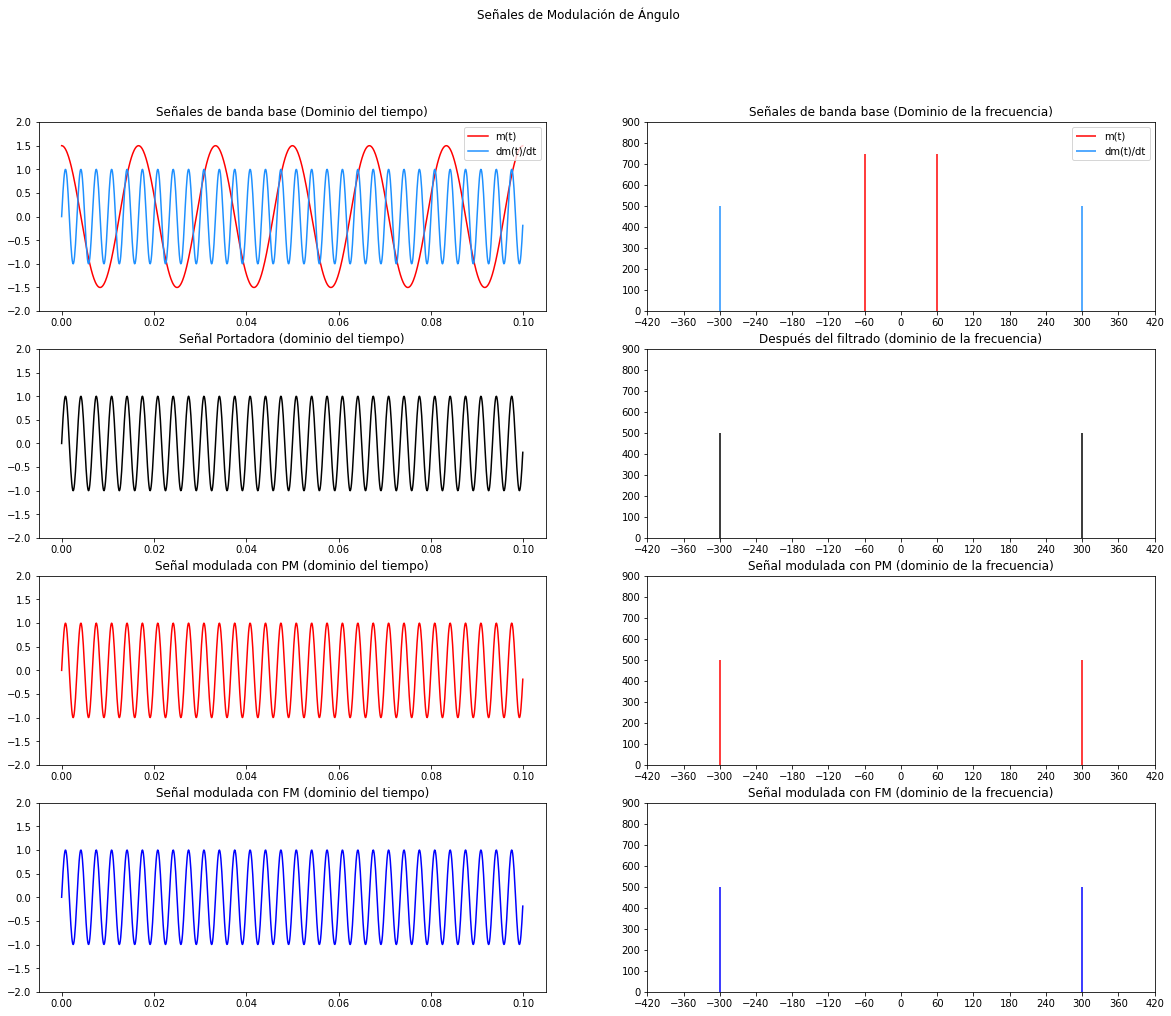

In [13]:
#Señales de entrada

#Numero de puntos y duracion
samples = 1000 
T = 0.1

#Espacio temporal
t = linspace(0, T, samples, endpoint=False)

#Señales iniciales:
#Moduladora
#Frecuencia de 60Hz, Amplitud de 1.5 y Offset de 2
fm = 60
Am = 1.5
Offm = 0
m = cosenoidal(fm,Am,Offm)
Mtf, M = plotfft(m)

#Protadora
#Frecuencia de 300Hz y Amplitud de 1
fc = 300
Ac = 1
c = cosenoidal(fc,Ac,0,-pi/2)
Ctf, C = plotfft(c)


#prueba
mp=c
MPtf=Ctf
MP=C

spm=c
SPM=C
SPMtf=Ctf

sfm=c
SFM=C
SFMtf=Ctf

#Plot de las señales desmodulada antes y despues del filtrado
fig3, axs = plt.subplots(4,2,figsize=(20,16))
fig3.suptitle('Señales de Modulación de Ángulo')

#Moduladora y su derivada
axs[0,0].plot(t,m,color='red')
axs[0,0].set_title('Señales de banda base (Dominio del tiempo)')
axs[0,0].set(ylim=(-2,2))
axs[0,0].plot(t,mp,color='dodgerblue')
axs[0,0].legend(["m(t)", "dm(t)/dt"])

axs[0,1].set(xlim=(-100,100),ylim=(0,900),xticks=(range(-420,480,60)))
axs[0,1].vlines(Mtf,0,numpy.abs(M),color='red')
axs[0,1].vlines(MPtf,0,numpy.abs(MP),color='dodgerblue')
axs[0,1].set_title('Señales de banda base (Dominio de la frecuencia)')
axs[0,1].legend(["m(t)", "dm(t)/dt"])

#Portadora
axs[1,0].plot(t,c,color='black')
axs[1,0].set(ylim=(-2,2))
axs[1,0].set_title('Señal Portadora (dominio del tiempo)')

axs[1,1].set(xlim=(-100,100),ylim=(0,900),xticks=(range(-420,480,60)))
axs[1,1].set_title('Después del filtrado (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,numpy.abs(C),color='black')

#SPM
axs[2,0].plot(t,spm, color='r')
axs[2,0].set(ylim=(-2,2))
axs[2,0].set_title('Señal modulada con PM (dominio del tiempo)')

axs[2,1].set(xlim=(-100,100),ylim=(0,900),xticks=(range(-420,480,60)))
axs[2,1].vlines(SPMtf,0,numpy.abs(SPM),color='red')
axs[2,1].set_title('Señal modulada con PM (dominio de la frecuencia)')

#SFM
axs[3,0].plot(t,sfm, color='b')
axs[3,0].set(ylim=(-2,2))
axs[3,0].set_title('Señal modulada con FM (dominio del tiempo)')

axs[3,1].set(xlim=(-100,100),ylim=(0,900),xticks=(range(-420,480,60)))
axs[3,1].vlines(SFMtf,0,numpy.abs(SFM),color='blue')
axs[3,1].set_title('Señal modulada con FM (dominio de la frecuencia)')
plt.show()


## ACTIVIDAD # 2


#### 1. Construya un sistema de comunicación modulador FM de tipo NBFM y NBPM. Elija y justifique los valores apropiados de las distintas variables que permitan observar el comportamiento esperado de ambos métodos. 


#### 2. Verifique las señales moduladas obtenidas tanto en el tiempo como en la frecuencia, explique los resultados obtenidos. 


#### 3. Para el caso del modulador NBFM, seleccione al menos dos valores de beta, uno donde se aprecie que existe modulación de amplitud residual, y otro valor de beta donde se mantengan los criterios de NBFM/PM, pero que NO se presente modulación en amplitud residual, justifique ambos valores de beta. Realice un análisis completo de los resultados obtenidos, para cada gráfica. 



## ACTIVIDAD # 3


#### 1. Construya un sistema de modulación WBFM, siguiendo lo lineamientos de este tipo de modulación en relación a beta y partiendo de la ecuación de señal modulada en FM: 𝑠FM(𝑡) = 𝐴c cos(2𝜋𝑓c t + 𝛽 sin(2𝜋𝑓m t)). Para la señal de mensaje puede usar el tono clásico: 𝑚(𝑡) = 𝐴m cos(2𝜋𝑓m t). 


#### 2- Despliegue, entre 3 y 5 gráficas de la señal modulada resultante en tiempo y la frecuencia, para diferentes valores de beta, variando únicamente 𝑓m y manteniendo constante 𝛥f. En las gráficas se debe visualizar el efecto de la variación en beta. Realice un análisis completo de los resultados obtenidos, para cada gráfica. 


#### 3- Despliegue, entre 3 y 5 gráficas de la señal modulada resultante en tiempo y la frecuencia, para diferentes valores de beta, variando únicamente 𝛥f y manteniendo 𝑓m constante. En las gráficas se debe visualizar el efecto de la variación en beta. Realice un análisis completo de los resultados obtenidos, para cada gráfica. 


#### 4- Escoja un valor de beta pequeño, como los usados en NBFM, grafique las curvas de frecuencia y verifique que se obtengan los resultados esperados, y realice un análisis completo de los resultados obtenidos. 


#### 5- Diseñe una rutina en la que obtenga las curvas de la función de Bessel. 